In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import kagglehub
from scipy.stats import skew, zscore
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")


print("Path to dataset files:", path)

Path to dataset files: /Users/franek/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [3]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Display the content of dataset
data = pd.read_csv(csv_path)

data.head(5)

Content of ['alzheimers_disease_data.csv']


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
import json


def load_classes():
    with open("../modules/classes.json", "r") as file:
        return json.load(file)


# Devided features into feature classes
cls_dt = load_classes()

In [5]:
diagnosis = data["Diagnosis"]

class_data = {cls_name: data[params] for cls_name, params in cls_dt.items()}
print("Classes of parameters:\n")
for cls_name, _ in class_data.items():
    print(cls_name)

Classes of parameters:

Demografic_Details
Lifestyle_Factors
Medical_History
Clinical_Measurements
Congnitive_and_Functional_Assements
Symptoms


<!-- @format -->

# Histograms


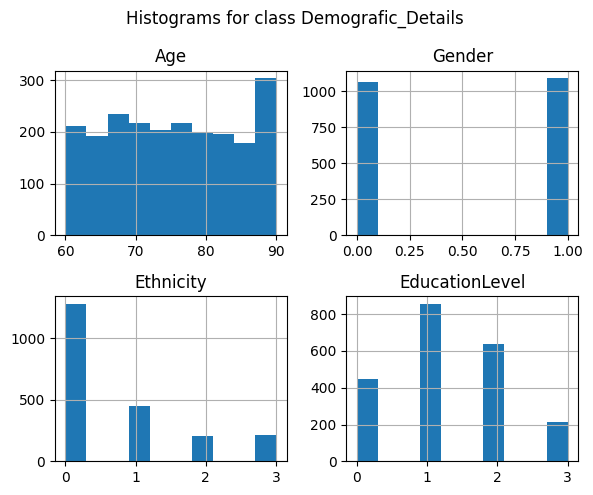

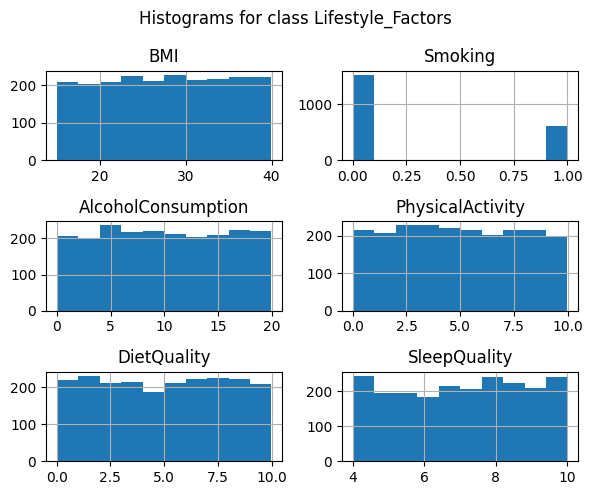

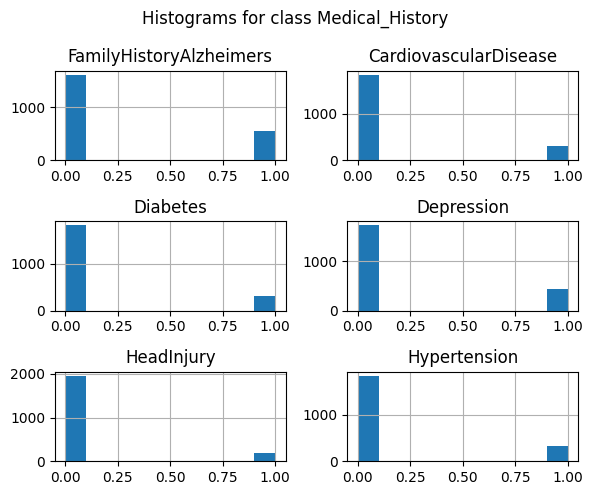

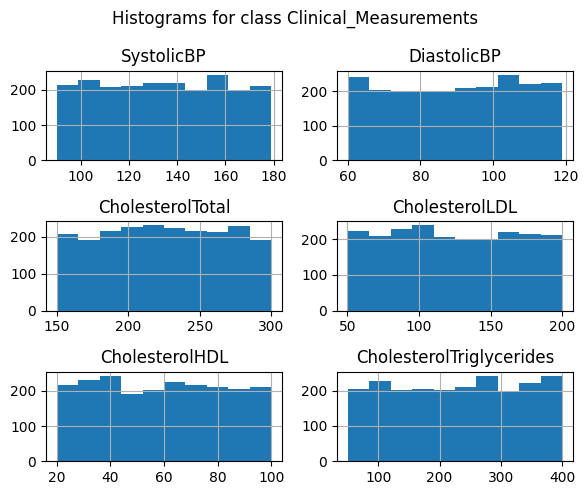

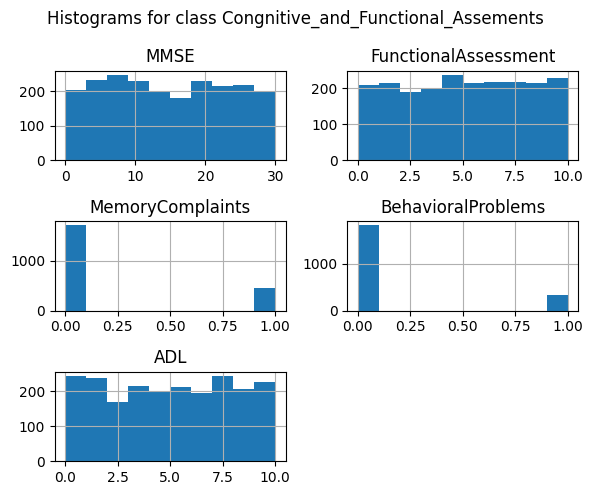

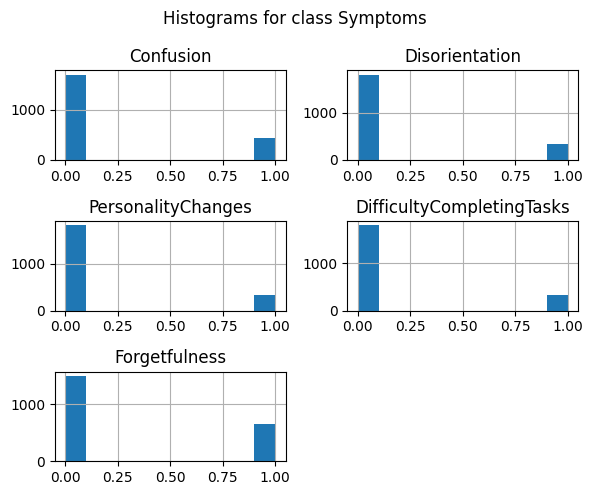

In [6]:
# Display histograms for each class
for cls_name, cls_data in class_data.items():
    cls_data.hist(figsize=(6, 5))
    plt.suptitle(f"Histograms for class {cls_name}")
    plt.tight_layout()

plt.show()

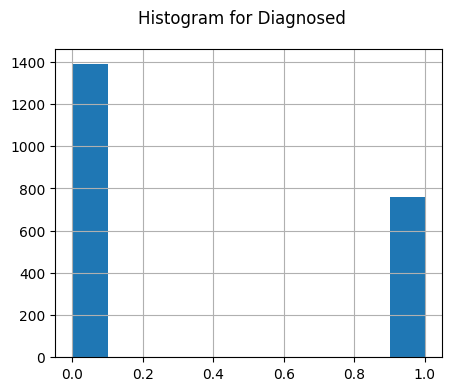

In [35]:
# Plot a histogram to visualize
# the distribution of the 'Diagnosed"
diagnosis.hist(figsize=(5, 4))
plt.suptitle(f"Histogram for Diagnosed")
plt.show()

<!-- @format -->

# Correlation matrix


In [11]:
import seaborn as sns

lifestyle["Diagnosis"] = diagnosis
feature_subsets = ["BMI", "PhysicalActivity", "DietQuality", "Diagnosis"]
sns.pairplot(lifestyle[feature_subsets], hue="Diagnosis")

NameError: name 'lifestyle' is not defined


Statistics for Age:
Mean: 74.91, Median: 75.00, Std: 8.99, Min: 60.00, Max: 90.00, Range: 30.00, Skewness: 0.05


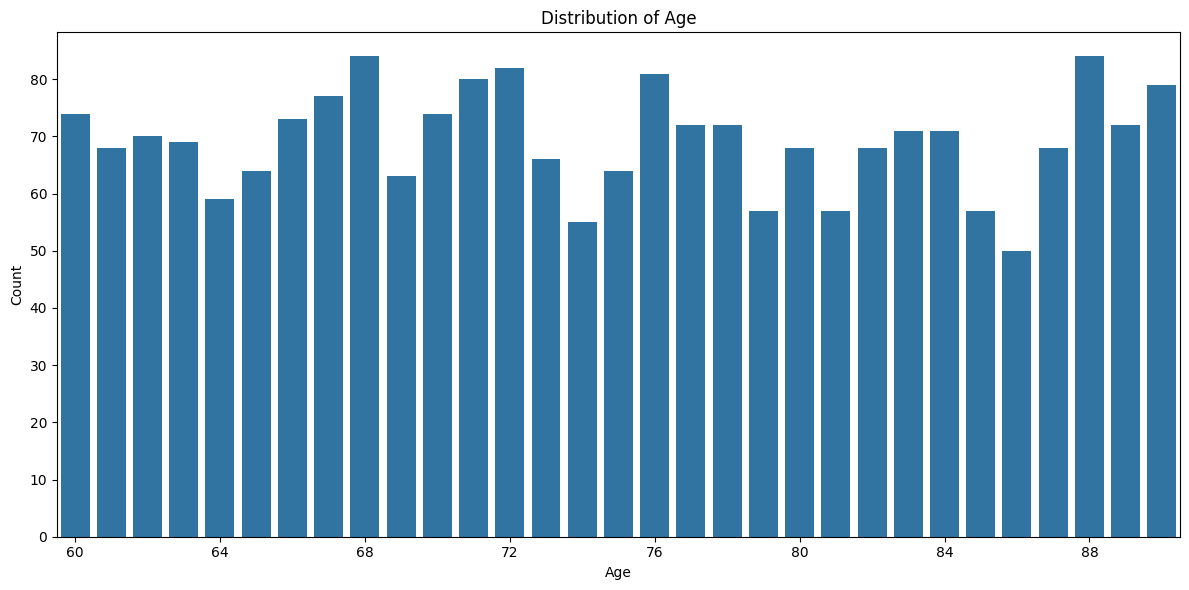


Statistics for Gender:
Mean: 0.51, Median: 1.00, Std: 0.50, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: -0.03


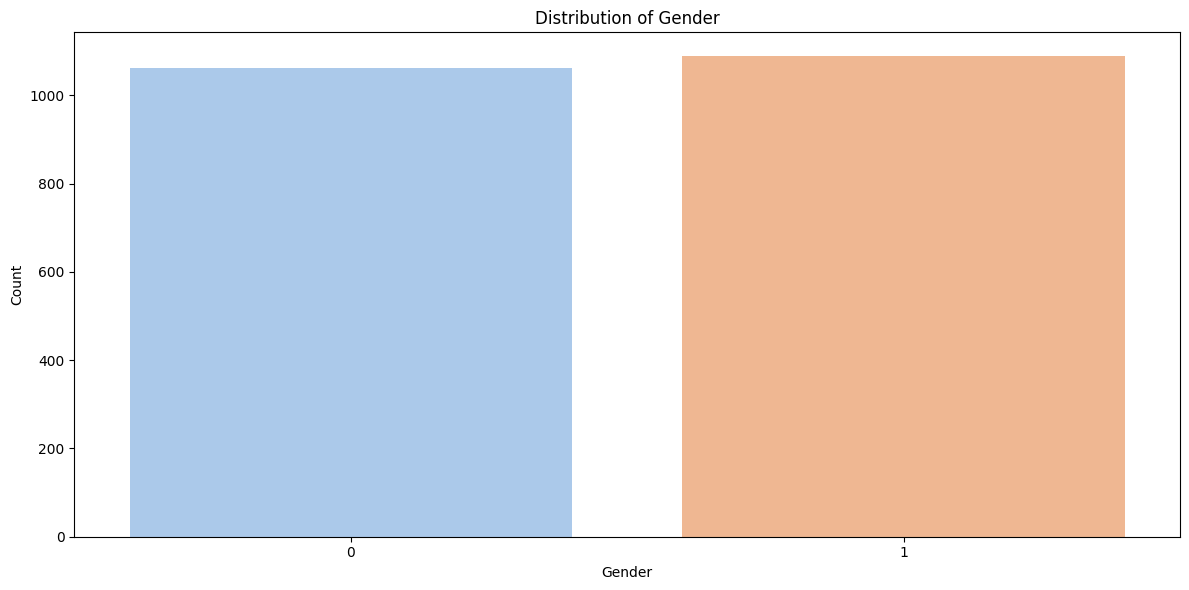


Statistics for Ethnicity:
Mean: 0.70, Median: 0.00, Std: 1.00, Min: 0.00, Max: 3.00, Range: 3.00, Skewness: 1.23
Ethnicity is highly skewed (skewness = 1.23), consider normalization.


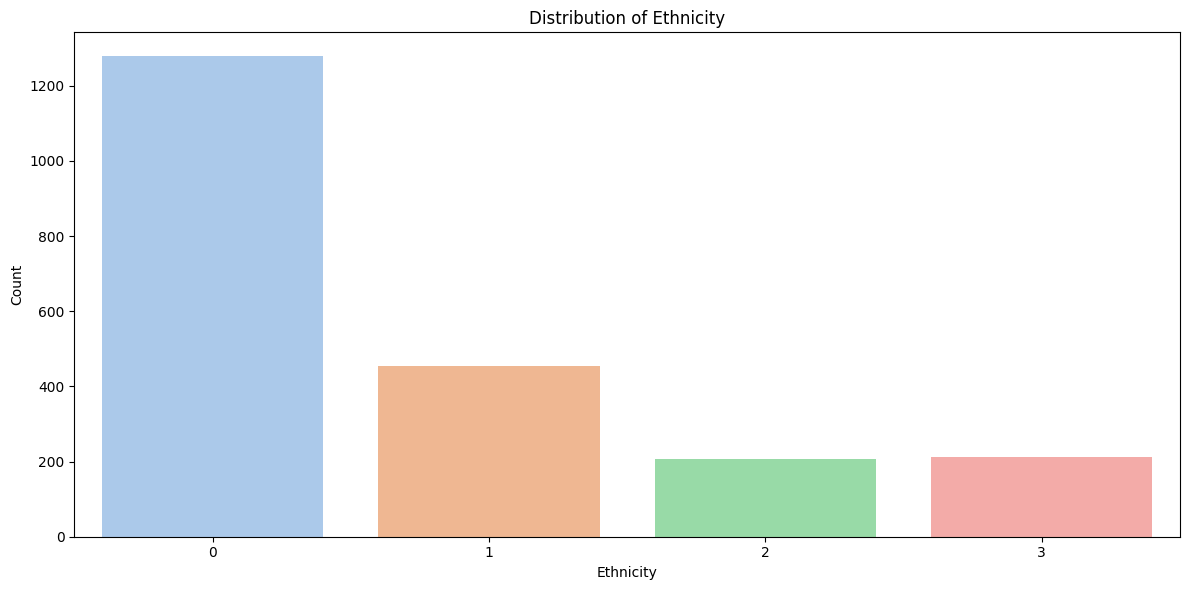


Statistics for EducationLevel:
Mean: 1.29, Median: 1.00, Std: 0.90, Min: 0.00, Max: 3.00, Range: 3.00, Skewness: 0.21


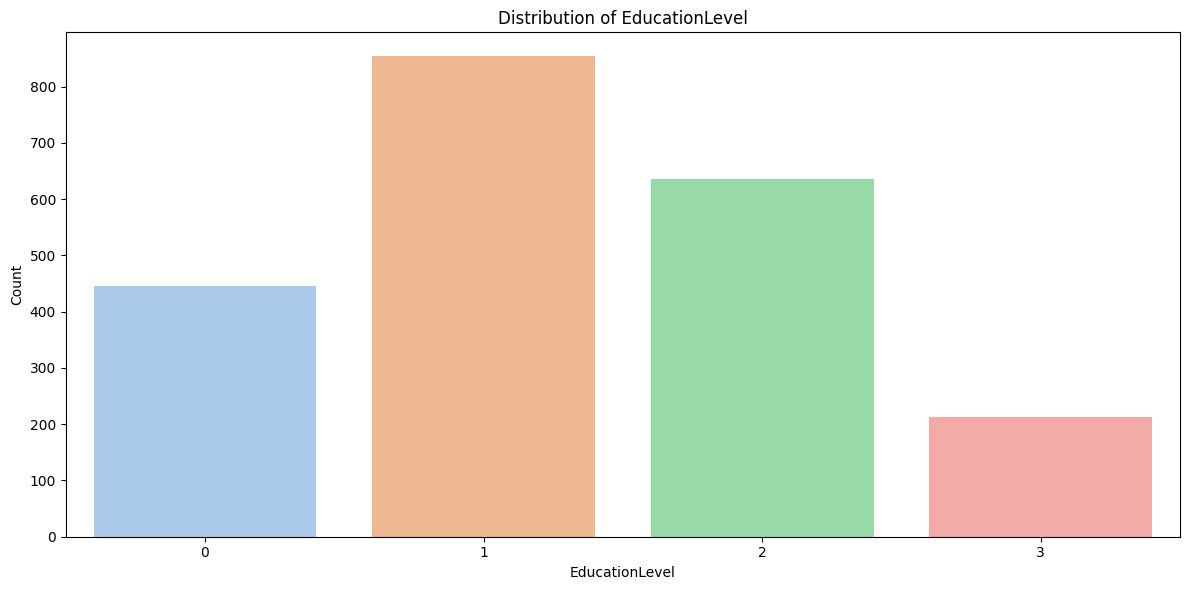


Statistics for Smoking:
Mean: 0.29, Median: 0.00, Std: 0.45, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 0.93


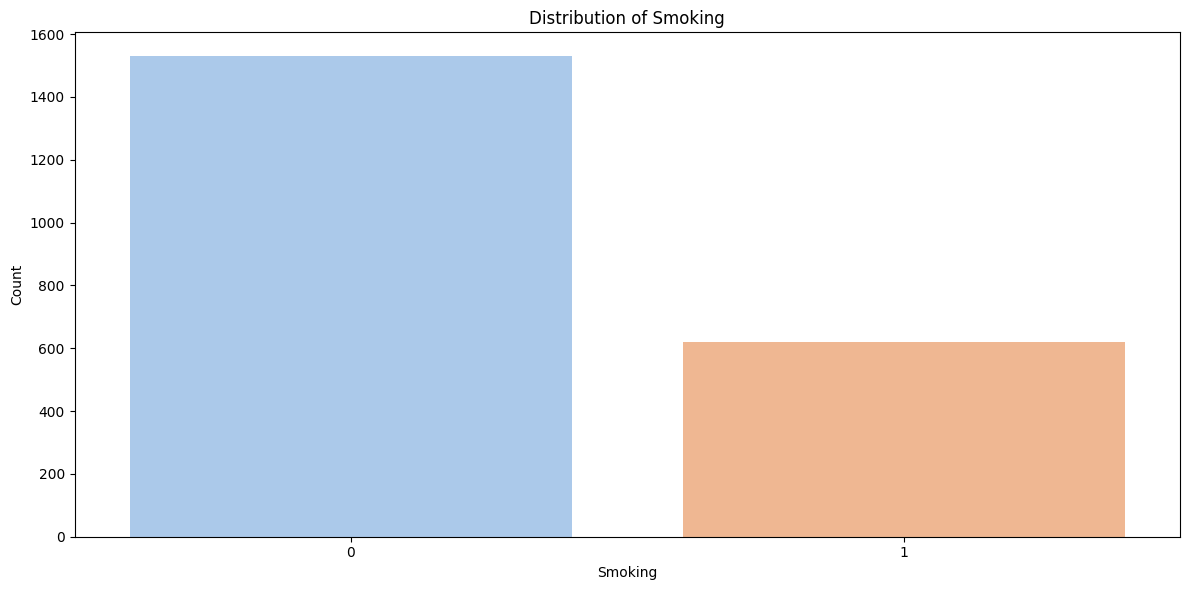


Statistics for FamilyHistoryAlzheimers:
Mean: 0.25, Median: 0.00, Std: 0.43, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 1.14
FamilyHistoryAlzheimers is highly skewed (skewness = 1.14), consider normalization.


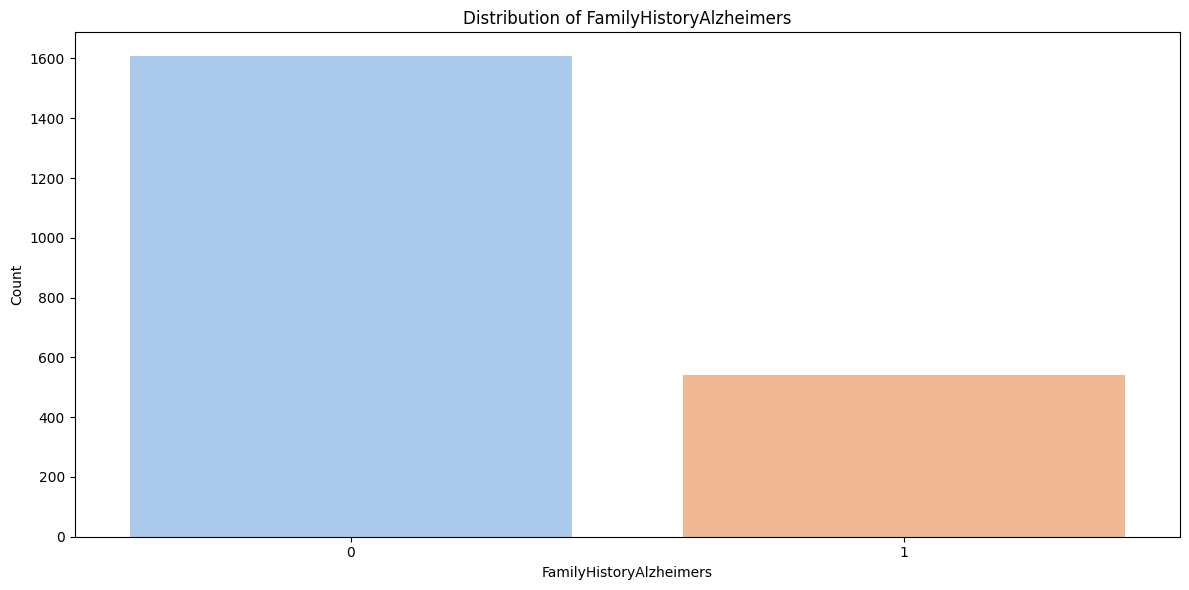


Statistics for CardiovascularDisease:
Mean: 0.14, Median: 0.00, Std: 0.35, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 2.03
CardiovascularDisease is highly skewed (skewness = 2.03), consider normalization.


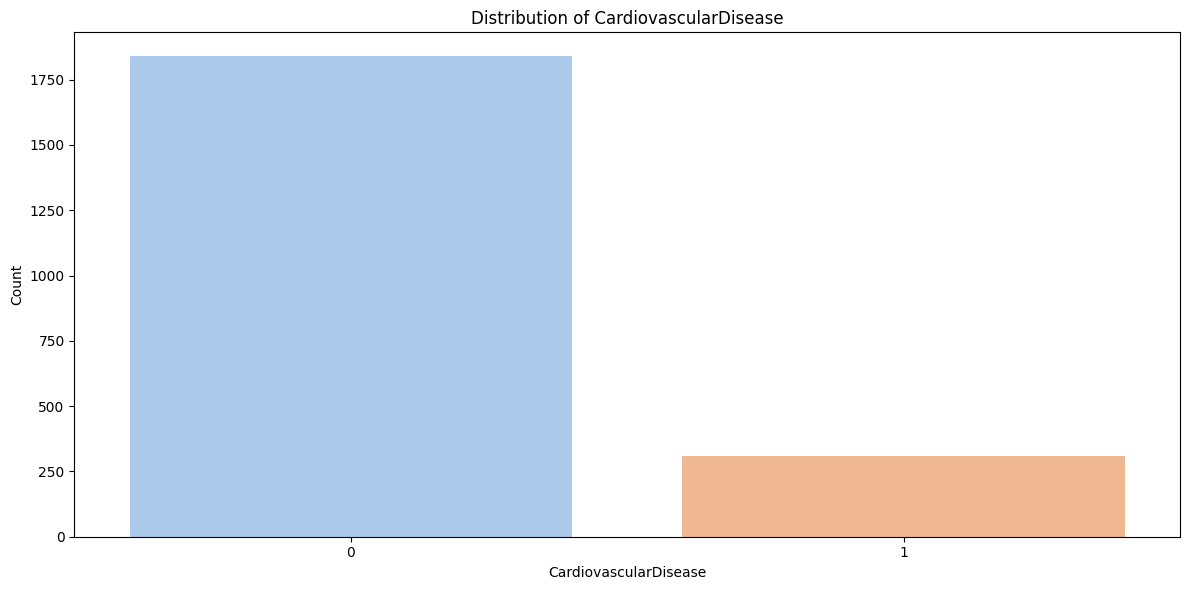


Statistics for Diabetes:
Mean: 0.15, Median: 0.00, Std: 0.36, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 1.95
Diabetes is highly skewed (skewness = 1.95), consider normalization.


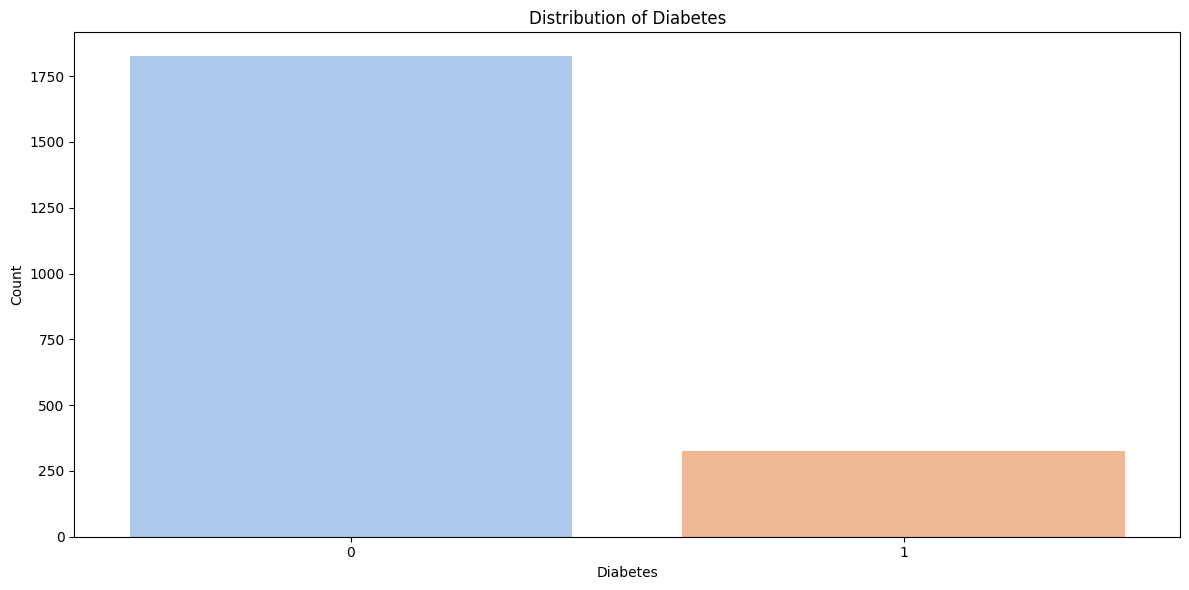


Statistics for Depression:
Mean: 0.20, Median: 0.00, Std: 0.40, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 1.50
Depression is highly skewed (skewness = 1.50), consider normalization.


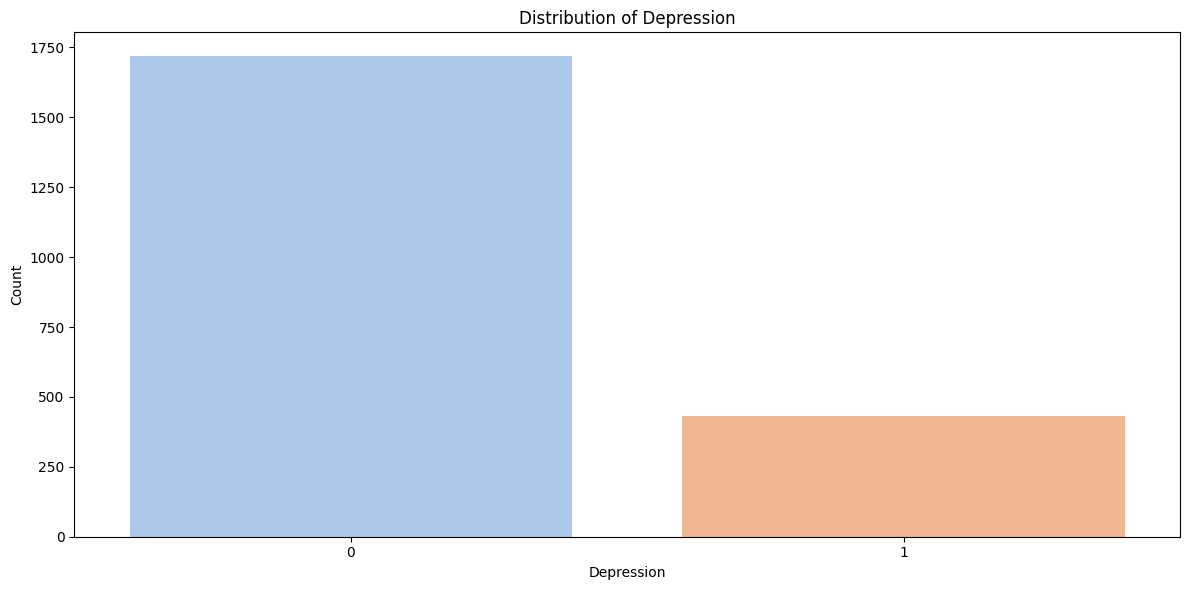


Statistics for HeadInjury:
Mean: 0.09, Median: 0.00, Std: 0.29, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 2.81
Outliers detected in HeadInjury.
HeadInjury is highly skewed (skewness = 2.81), consider normalization.


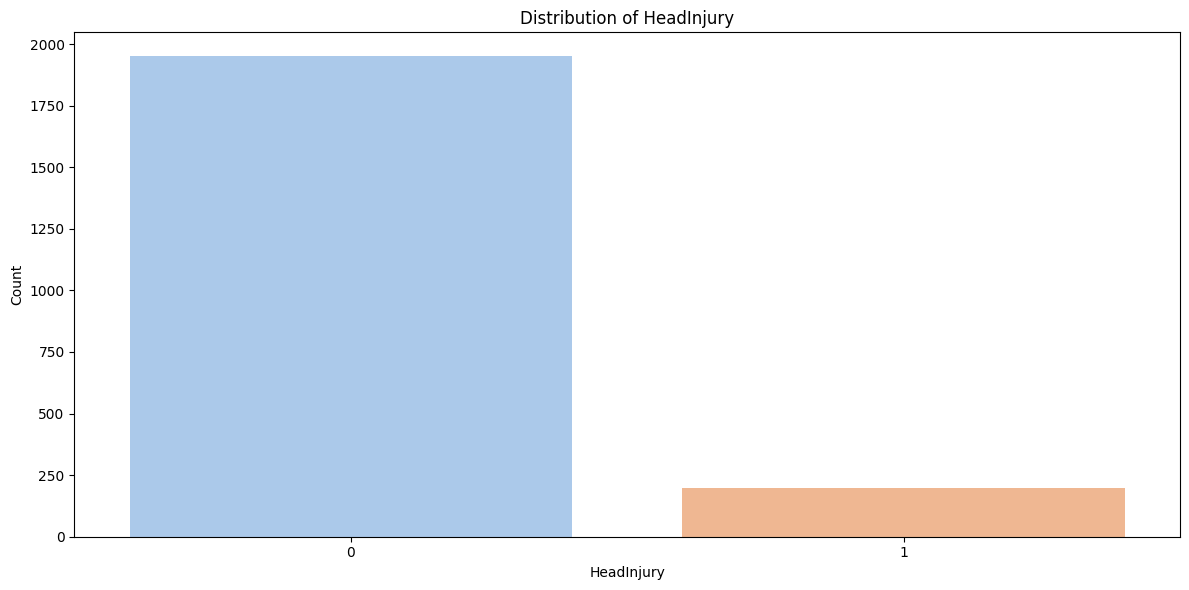


Statistics for Hypertension:
Mean: 0.15, Median: 0.00, Std: 0.36, Min: 0.00, Max: 1.00, Range: 1.00, Skewness: 1.97
Hypertension is highly skewed (skewness = 1.97), consider normalization.
Hypertension has been standardized.


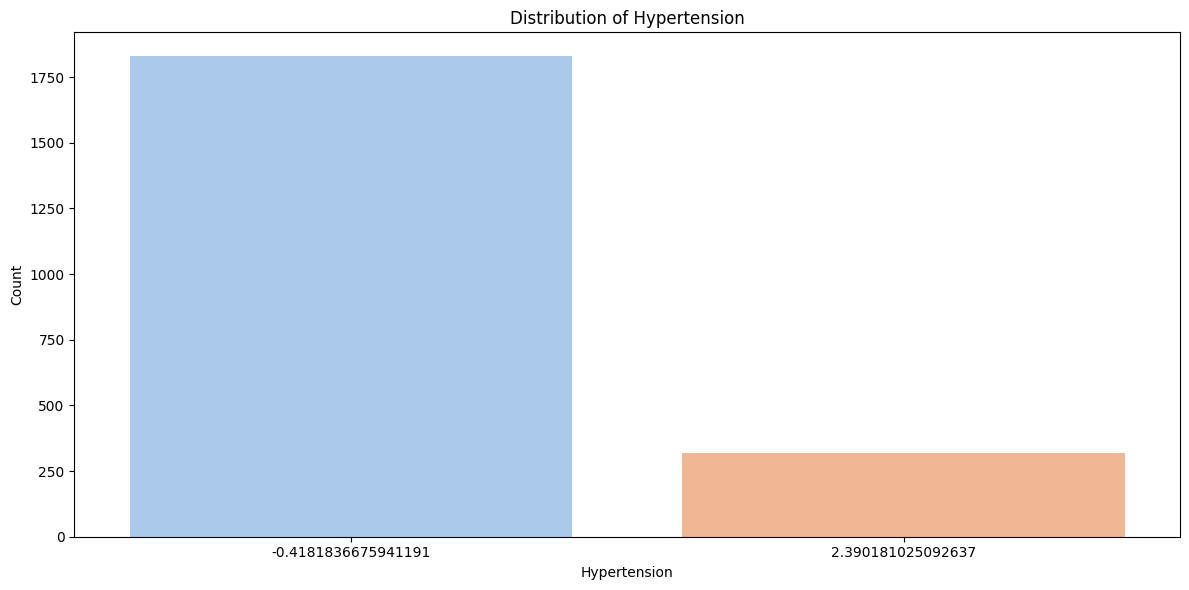


Statistics for SystolicBP:
Mean: 134.26, Median: 134.00, Std: 25.95, Min: 90.00, Max: 179.00, Range: 89.00, Skewness: 0.01


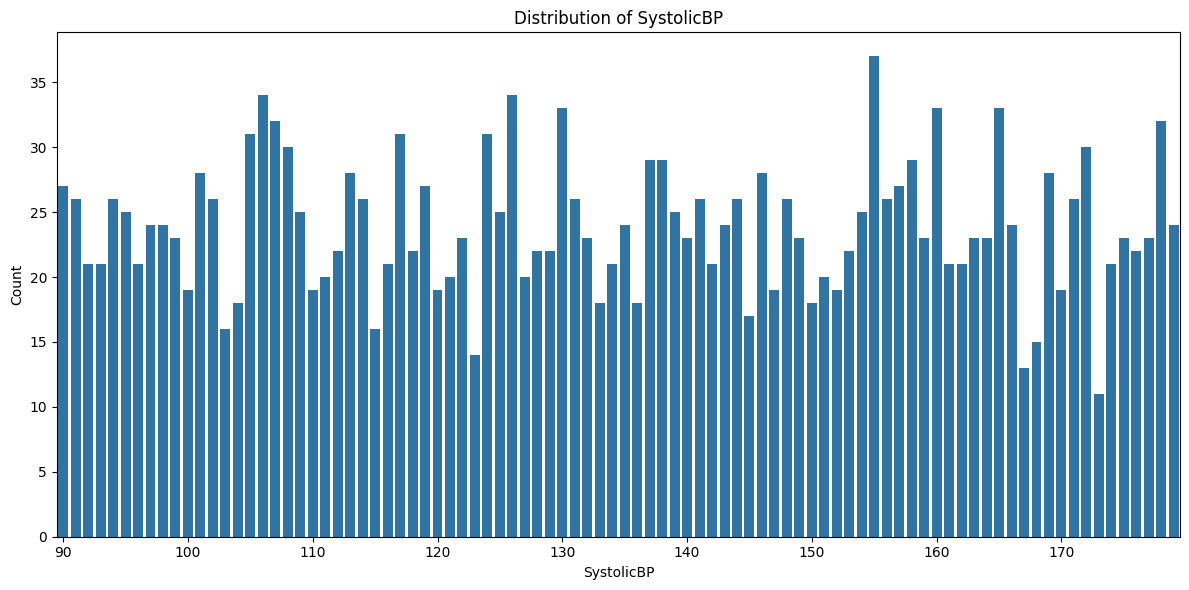


Statistics for DiastolicBP:
Mean: 89.85, Median: 91.00, Std: 17.59, Min: 60.00, Max: 119.00, Range: 59.00, Skewness: -0.05


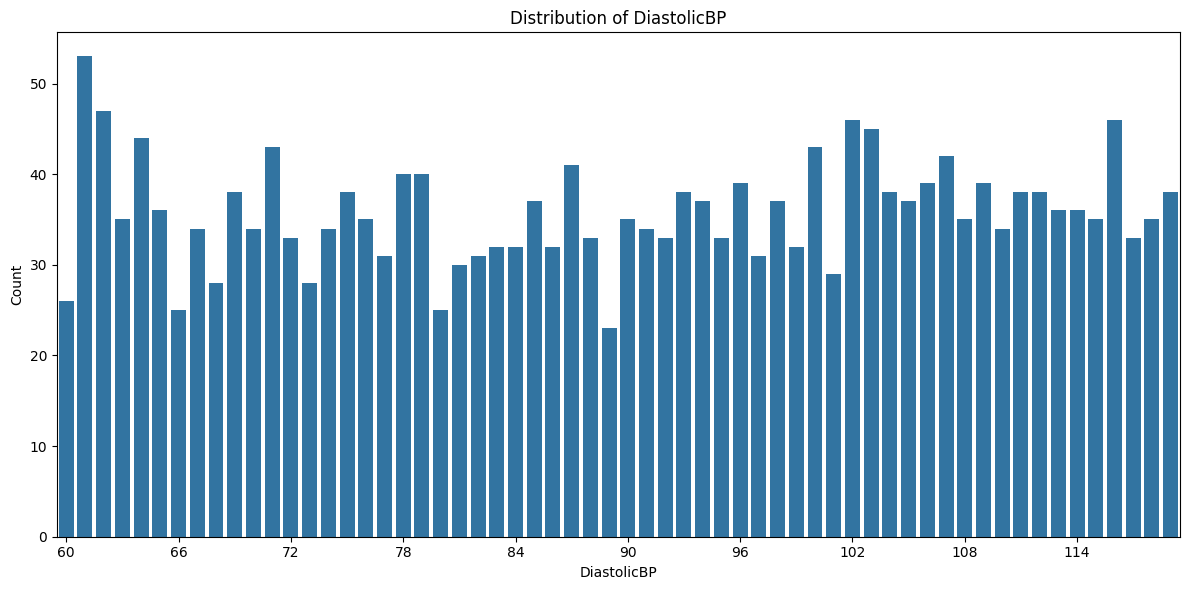

In [ ]:

def describe_feature_scales_and_distribution(data):
    for col in data.columns:
        if data[col].dtype == 'int64':  # Process only integer columns
            # Basic statistics
            mean, median, std = data[col].mean(), data[col].median(), data[col].std()
            min_val, max_val, range_val = data[col].min(), data[col].max(), data[col].max() - data[col].min()
            skewness = skew(data[col].dropna())  # Skewness of the column
            
            print(f"\nStatistics for {col}:")
            print(f"Mean: {mean:.2f}, Median: {median:.2f}, Std: {std:.2f}, Min: {min_val:.2f}, Max: {max_val:.2f}, Range: {range_val:.2f}, Skewness: {skewness:.2f}")

            # Detect outliers using Z-scores
            z_scores = zscore(data[col].dropna())
            outliers = np.where(np.abs(z_scores) > 3)
            if len(outliers[0]) > 0:
                print(f"Outliers detected in {col}.")

            # Skewness handling (Normalization if needed)
            if np.abs(skewness) > 1:
                print(f"{col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")
                if col == "Hypertension":  # Example column for standardization
                    # Manual Standardization
                    mean_col = data[col].mean()
                    std_col = data[col].std()
                    data[col] = (data[col] - mean_col) / std_col  # Apply the formula for standardization
                    print(f"{col} has been standardized.")

            # Plotting the distribution
            plt.figure(figsize=(12, 6))
            if len(data[col].unique()) > 5:
                sns.countplot(data=data, x=col, hue=None, legend=False)
            else:
                sns.countplot(data=data, x=col, hue=col, palette="pastel", legend=False)

            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=0, ha='center')
            plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))
            plt.tight_layout()
            plt.show()

# Calling the function with data
new_data = data.drop("PatientID", axis=1)  # Drop PatientID column if it exists
describe_feature_scales_and_distribution(new_data)